In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches
from scipy.stats import norm

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams.update({'font.size': 8})

In [22]:
grid_size = .01
H = 5

In [23]:
grid = np.arange(0, 1+grid_size, grid_size)

In [24]:
Q_vals = np.zeros([H, len(grid), len(grid)])
r_vals = np.zeros([H, len(grid), len(grid)])
V_vals = np.zeros([H, len(grid)])

In [25]:
# ## QUADRATIC

# def f(h,state,action):
#     return 1 - 10*(state - .75)**2
# def sigma(h, state, action):
#     return 0

# ## LAPLACE
def f(h, state, action):
    return 1 - np.exp(-1*np.abs(state - .7))
def sigma(h, state, action):
    return 0
# ## NOISE
# def f(h, state, action):
#     return 1 - np.exp(-10*np.abs(state*action - .7))
# def sigma(h, state, action):
#     return .1*(state + action)**2
# SPARSE 
def f(h, state, action):
    if h == 0:
        return (1/5)*(h+1)*np.exp(-1*np.abs(state - .5))
    elif h == 1:
        return (1/5)*(h+1)*np.exp(-1*np.abs(state - .25))  
    elif h == 2:
        return (1/5)*(h+1)*np.exp(-1*np.abs(state - .5))     
    elif h == 3:
        return (1/5)*(h+1)*np.exp(-1*np.abs(state - .75))     
    elif h == 4:
        return (1/5)*(h+1)*np.exp(-1*np.abs(state - 1))    
def sigma(h, state, action):
    return .025*(state+action)**2

alpha = 1

In [26]:
for h in np.arange(H-1, -1, -1):
    print(h)
    for s in range(len(grid)):
        for a in range(len(grid)):
            state = grid[s]
            action = grid[a]
            r_vals[h,s,a]= min(max(f(h,state,action) - alpha*np.abs(state-action),0),1)
            if h == H-1:
                Q_vals[h,s,a] = min(max(f(h,state,action) - alpha*np.abs(state-action),0),1)
            else:
                variance = sigma(h, state, action)
                if variance == 0:
                    Q_vals[h,s,a] = min(max(f(h,state,action) - alpha*np.abs(state-action),0),1) + V_vals[h+1, a]
                else:
                    lhs = np.copy(grid)
                    lhs[0] = float('-inf')
                    
                    rhs = np.copy(grid)+grid_size
                    rhs[-1] = float('inf')
                    weights = norm.cdf(rhs, action, np.sqrt(variance)) \
                                        - norm.cdf(lhs, action, np.sqrt(variance))

                    v_Est = np.dot(weights, V_vals[h+1, :])
                    Q_vals[h,s,a] = min(max(f(h,state,action) - alpha*np.abs(state-action),0),1) + v_Est
                    
        V_vals[h,s] = np.max(Q_vals[h,s,:])

4
3
2
1
0


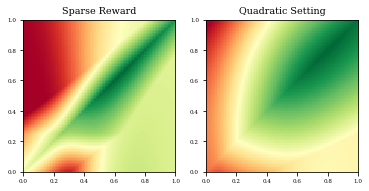

In [11]:
h = 1
fig = plt.figure()
s = plt.subplot(1,2,1)
# s = fig.add_subplot(1,1,1, xlabel='State', ylabel='Action')
plt.title('Sparse Reward')
im = s.imshow(Q_vals[h,:,:], cmap='RdYlGn', extent = (0,1,0,1), origin='lower')


s = plt.subplot(1,2,2)
# s = fig.add_subplot(1,1,1, xlabel='State', ylabel='Action')
plt.title('Quadratic Setting')
im = s.imshow(Q_vals_2[h,:,:], cmap='RdYlGn', extent = (0,1,0,1), origin='lower')

plt.show()

plt.tight_layout()
fig.savefig('./figures/sparse_and_quadratic.pdf', bbox_inches = 'tight',
    pad_inches = 0.01, dpi=900)
plt.close("all")

In [ ]:
fig = plt.figure()
s = fig.add_subplot(1,1,1, xlabel='State', ylabel='Action')
plt.title('Heat Map of $Q$ Values')
im = s.imshow(Q_vals[h,:,:], cmap='RdYlGn', extent = (0,1,0,1), origin='lower')
fig.colorbar(im)

In [ ]:
fig = plt.figure(figsize=(7.2, 7.5))
plt.title('True Q-Values of Problem')
s = plt.subplot(2,2,1)
plt.xlabel('State')
plt.ylabel('Action')
plt.title('Step One')
im = s.imshow(Q_vals[1,:,:], cmap='RdYlGn', extent = (0,1,0,1), origin='lower')
fig.colorbar(im)

s = plt.subplot(2,2,2)
plt.xlabel('State')
plt.ylabel('Action')
plt.title('Step Two')
im = s.imshow(Q_vals[2,:,:], cmap='RdYlGn', extent = (0,1,0,1), origin='lower')
fig.colorbar(im)

s = plt.subplot(2,2,3)
plt.xlabel('State')
plt.ylabel('Action')
plt.title('Step Three')
im = s.imshow(Q_vals[3,:,:], cmap='RdYlGn', extent = (0,1,0,1), origin='lower')
fig.colorbar(im)

s = plt.subplot(2,2,4)
plt.xlabel('State')
plt.ylabel('Action')
plt.title('Step Four')
im = s.imshow(Q_vals[4,:,:], cmap='RdYlGn', extent = (0,1,0,1), origin='lower')
fig.colorbar(im)

plt.tight_layout()
fig.savefig('./figures/laplace_10.pdf', bbox_inches = 'tight',
    pad_inches = 0.01, dpi=900)
plt.close("all")